# 2021 Visualizations

This notebook produces visualizations for the ACS standard dataframes for cities of interest. 

## Read in Data

In [1]:
# import required libraries
import os
import sys
### add system path to get other library directories
sys.path[0] = os.path.join(os.path.abspath(''),'..')

import geopandas
import warnings
import pandas as pd
import math
import statistics
import matplotlib.pyplot as plt
import contextily as cx
import zipfile
import seaborn as sns
import glob
from lib import visualizations as viz
warnings.filterwarnings('ignore')

In [2]:
## if file doesn't exist then unzip
if os.path.exists("/tmp/data/standard_dataframes/standard_acs_censustract_df_2021.geojson"):
    ACS_2021_MERGED_FILE = "/tmp/data/standard_dataframes/standard_acs_censustract_df_2021.geojson"
else:
    with zipfile.ZipFile('/tmp/data/standard_dataframes/standard_acs_censustract_df_2021.zip', 'r') as zip_ref:
        zip_ref.extractall('/tmp/data/standard_dataframes/')
    ACS_2021_MERGED_FILE = "/tmp/data/standard_dataframes/standard_acs_censustract_df_2021.geojson"
    
if os.path.exists("/tmp/data/standard_dataframes/standard_acs_censustract_df_2017.geojson"):
    ACS_2017_MERGED_FILE = "/tmp/data/standard_dataframes/standard_acs_censustract_df_2017.geojson"
else:
    with zipfile.ZipFile('/tmp/data/standard_dataframes/standard_acs_censustract_df_2017.zip', 'r') as zip_ref:
        zip_ref.extractall('/tmp/data/standard_dataframes/')
    ACS_2017_MERGED_FILE = "/tmp/data/standard_dataframes/standard_acs_censustract_df_2017.geojson"

In [3]:
# read in the files
acs_2017_standard_df = geopandas.read_file(ACS_2017_MERGED_FILE)
acs_2021_standard_df = geopandas.read_file(ACS_2021_MERGED_FILE)

## Check dimensions to see how many columns are in each dataframe

In [4]:
acs_2017_standard_df.shape

(12611, 250)

In [5]:
acs_2021_standard_df.shape

(13341, 251)

---

## Plotting

### Maps by City for 2017: "PERC Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"

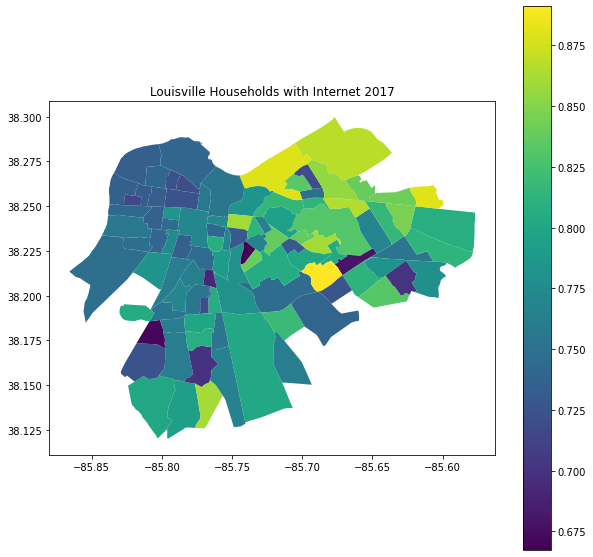

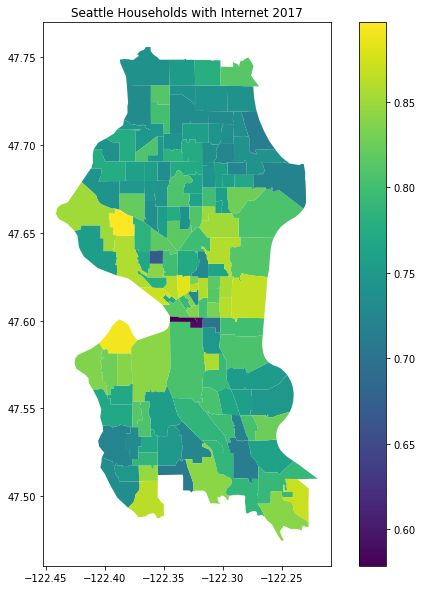

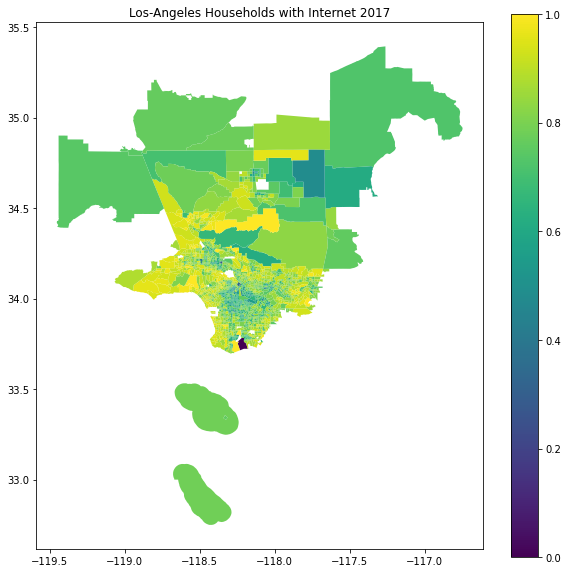

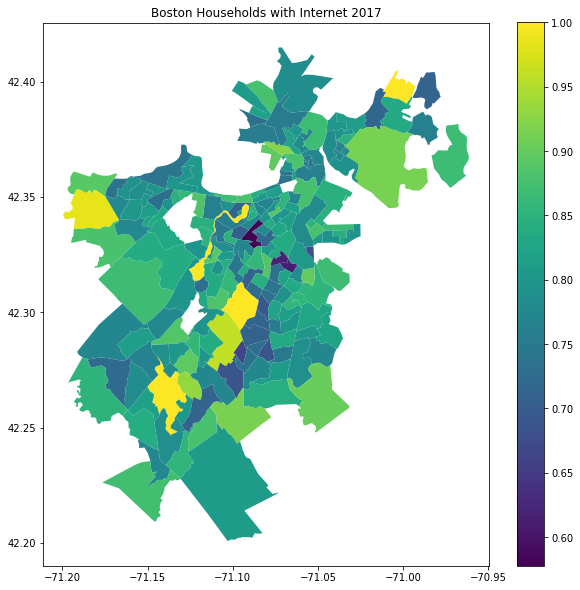

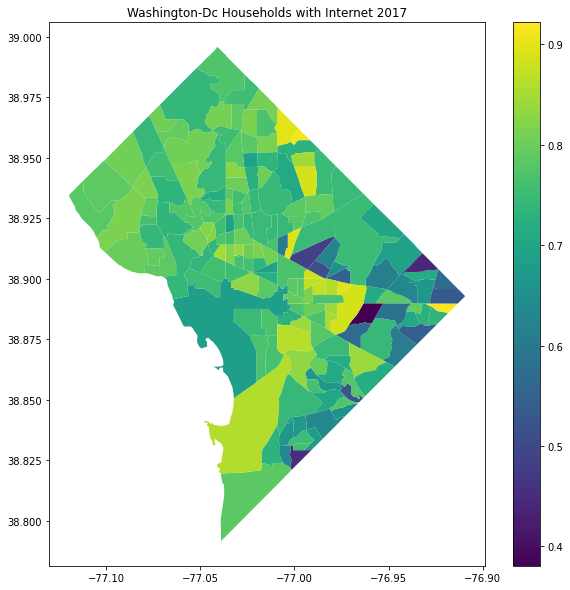

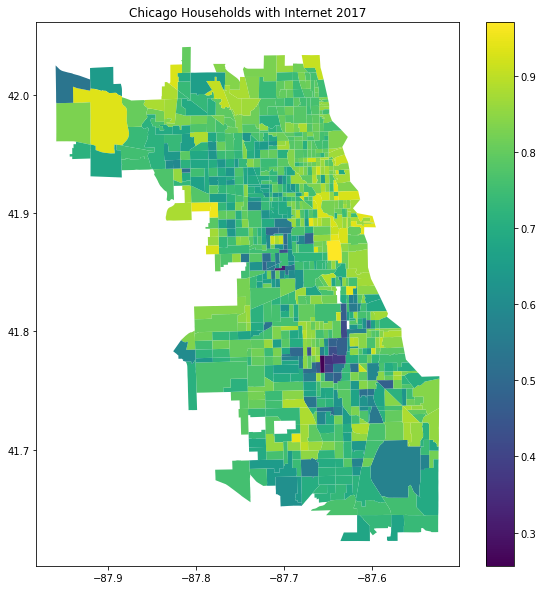

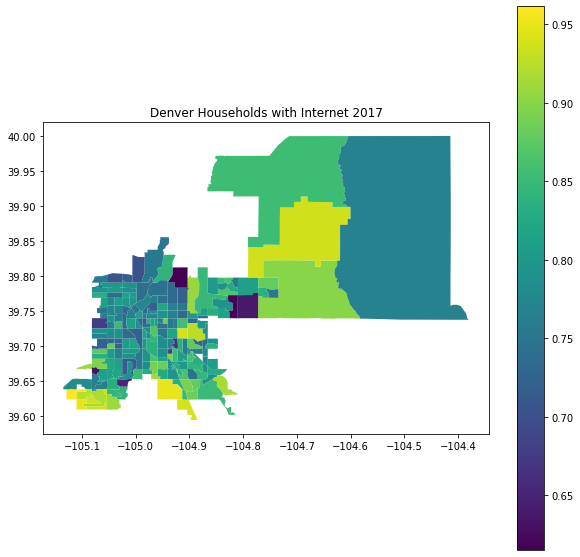

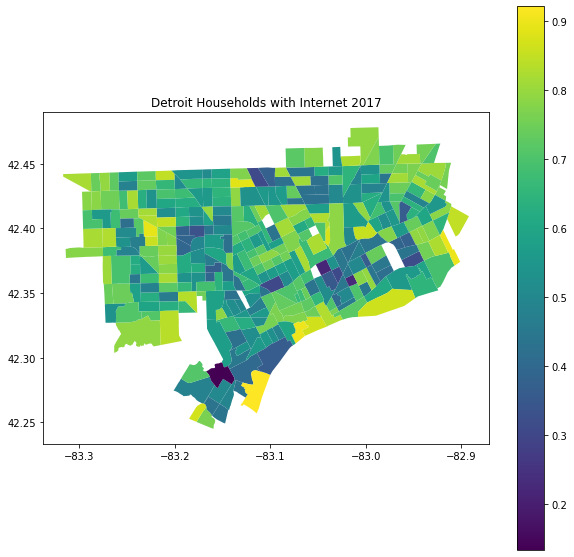

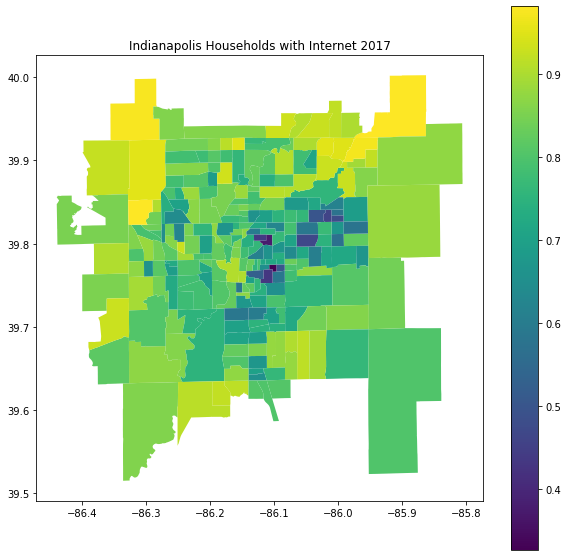

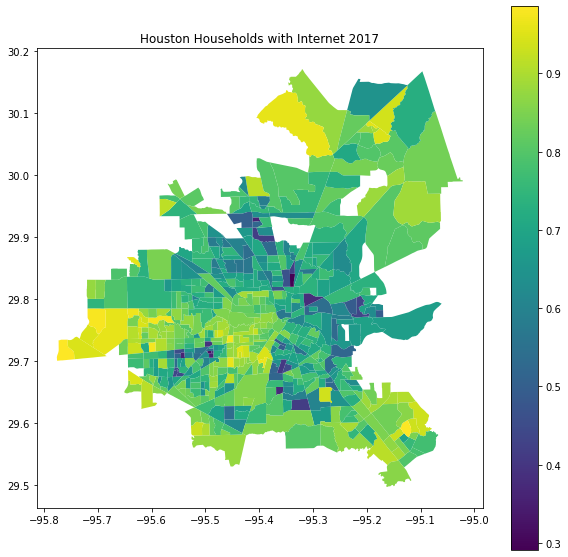

In [6]:
for city in set(acs_2017_standard_df['City']):
    city_df = acs_2017_standard_df[acs_2017_standard_df['City'] == city]
    city_df['int %'] = city_df["PERC Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"]
    viz.simple_map(city_df.drop_duplicates(subset='tract'), 'int %', 
                  'tract', f'{city.title()} Households with Internet 2017', f"/tmp/visualizations/{city}-acs-internet-2017.png")

### Maps by City for 2021: "PERC Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"

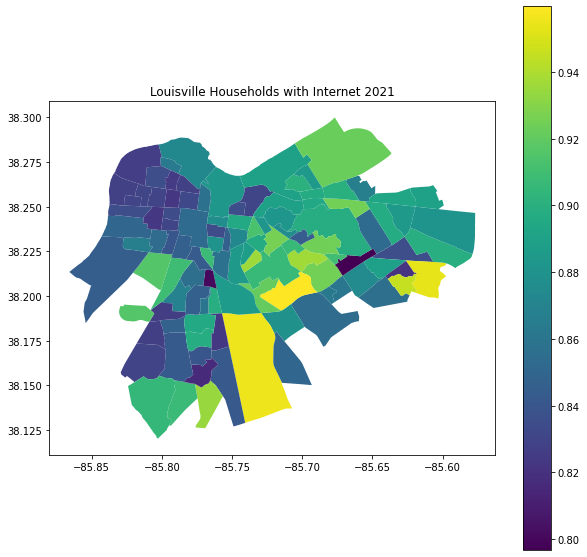

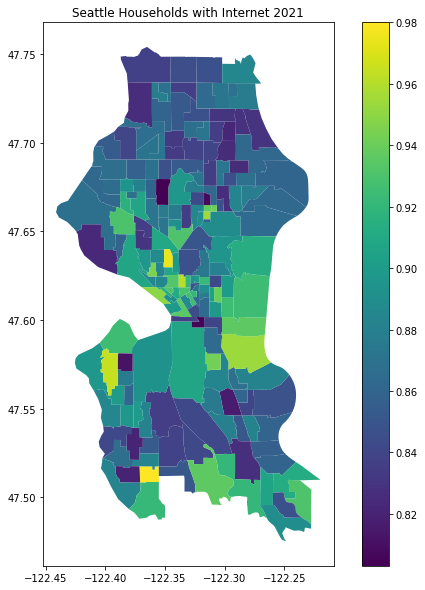

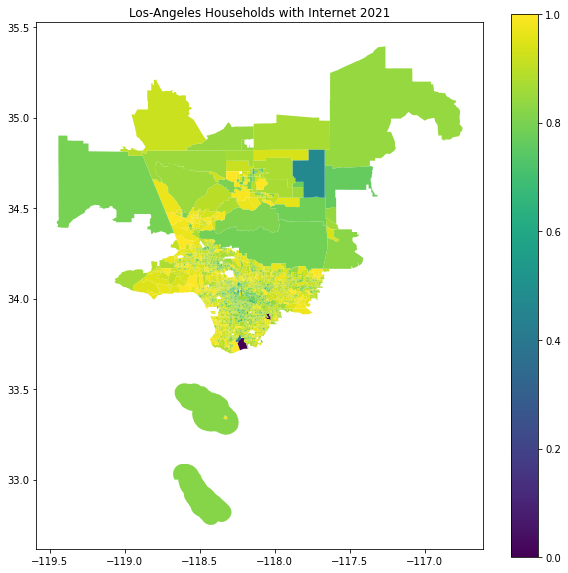

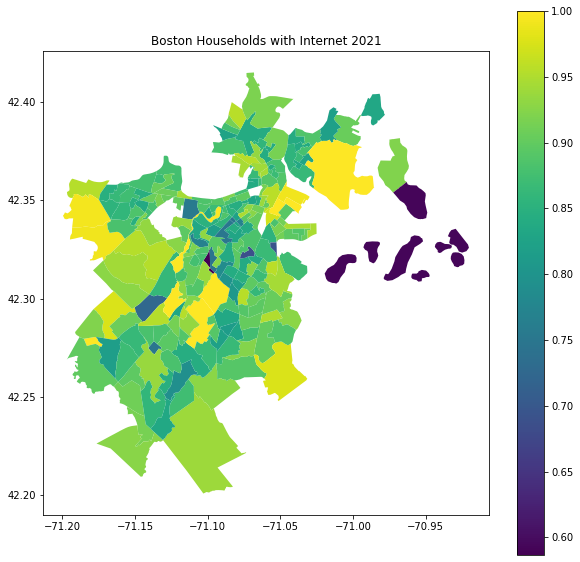

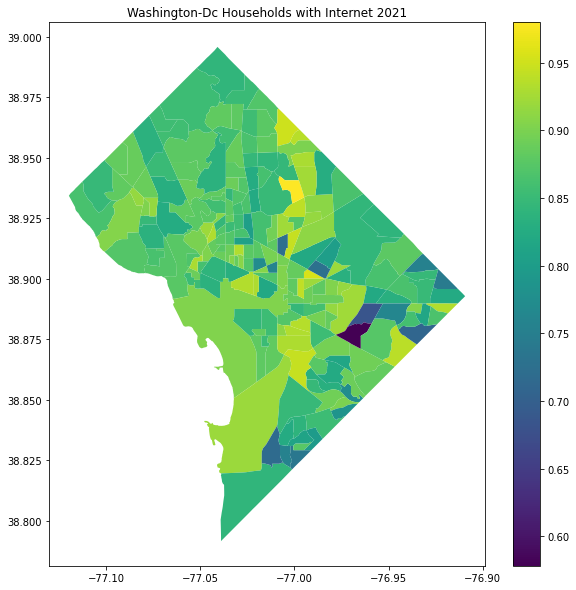

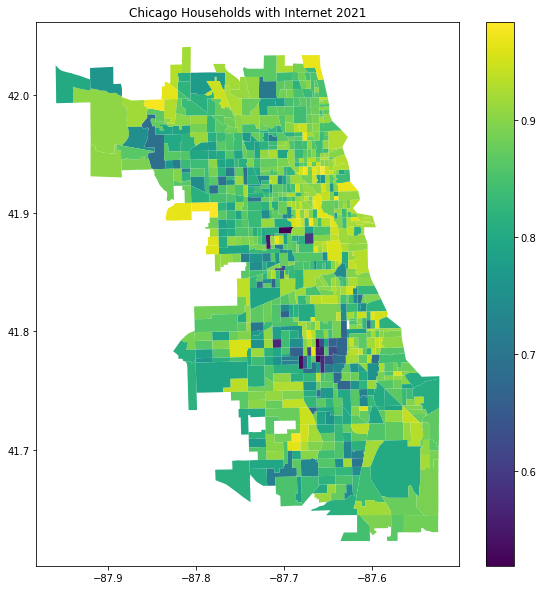

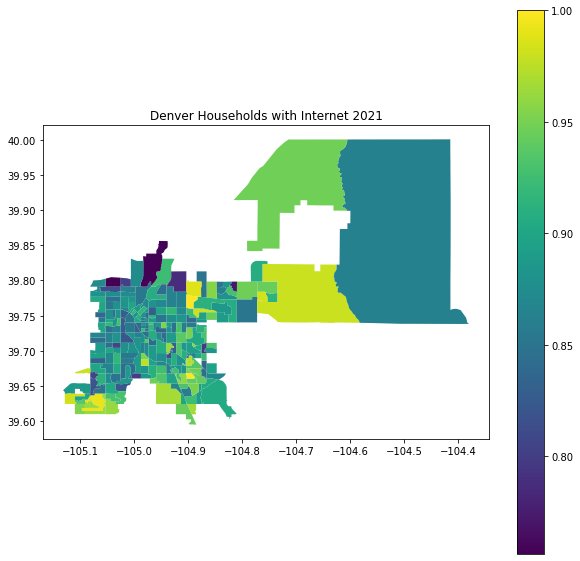

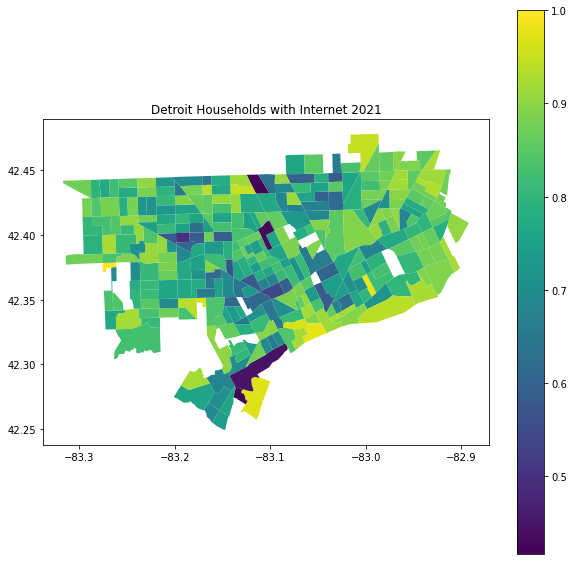

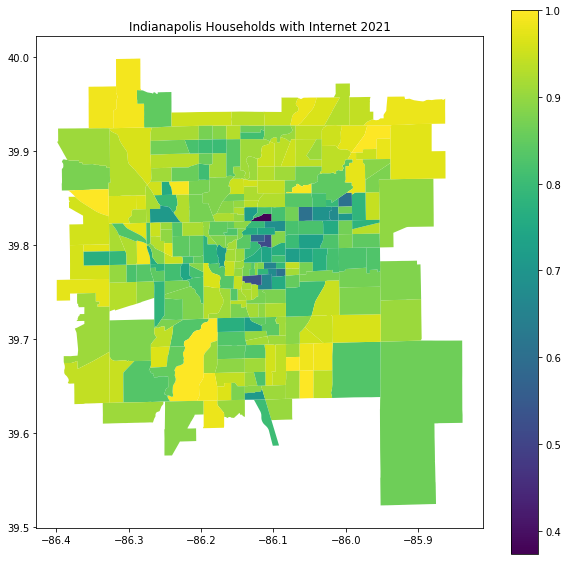

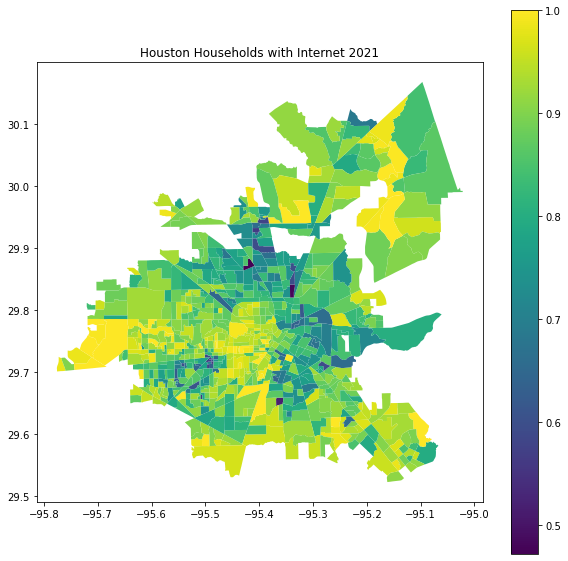

In [7]:
for city in set(acs_2021_standard_df['City']):
    city_df = acs_2021_standard_df[acs_2021_standard_df['City'] == city]
    viz.simple_map(city_df.drop_duplicates(subset='tract'), "PERC Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD", 
                  'tract', f'{city.title()} Households with Internet 2021', f"/tmp/visualizations/{city}-acs-internet-2017.png")

### Combined Scatterplots (2021)

These scatterplots can be duplicated for 2017. The last argument cues the plots on whether or not to draw a regression line

#### Part One: Race

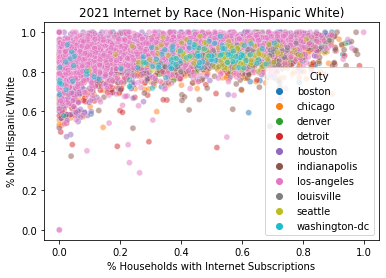

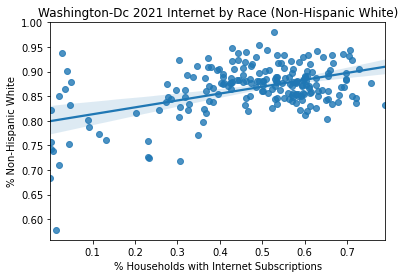

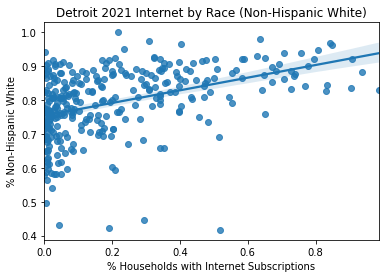

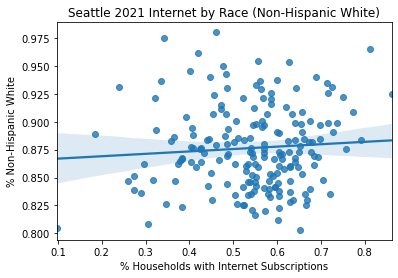

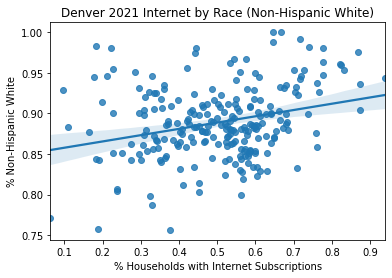

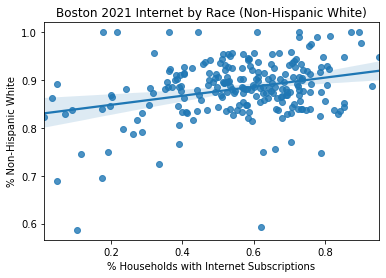

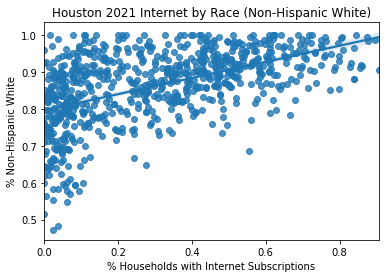

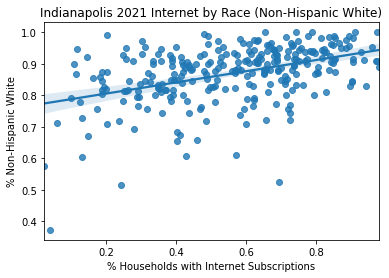

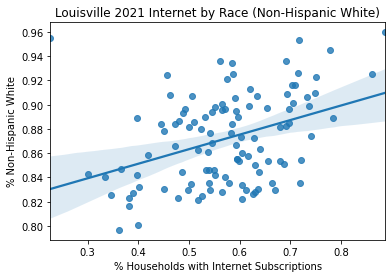

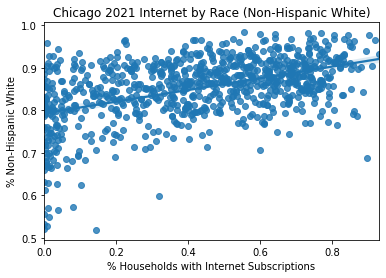

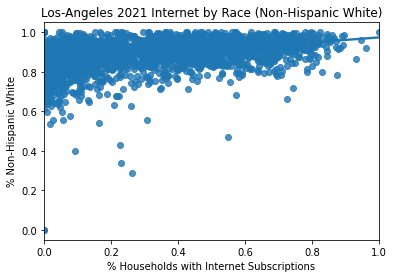

In [4]:
viz.plot_scatter(acs_2021_standard_df.drop_duplicates(subset='tract', keep='first'), "% Non-Hispanic White",
                "PERC Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
                "City",
                 f'2021 Internet by Race (Non-Hispanic White)',
                 '% Households with Internet Subscriptions',
                 '% Non-Hispanic White'
                )

for city in set(acs_2021_standard_df['City']):
    city_df = acs_2021_standard_df[acs_2021_standard_df['City'] == city]
    viz.plot_scatter(city_df.drop_duplicates(subset='tract'), "% Non-Hispanic White", 
                     "PERC Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD", 
                 'City',
                f'{city.title()} 2021 Internet by Race (Non-Hispanic White)',
                '% Households with Internet Subscriptions',
                '% Non-Hispanic White', True)

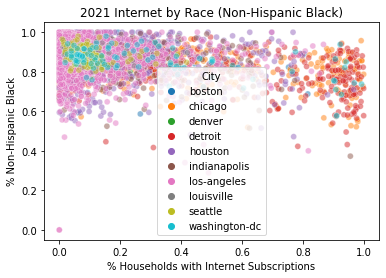

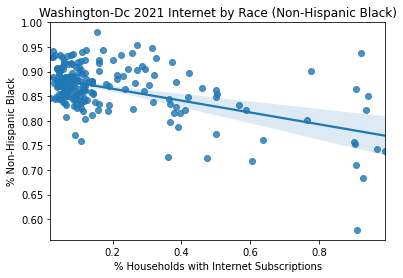

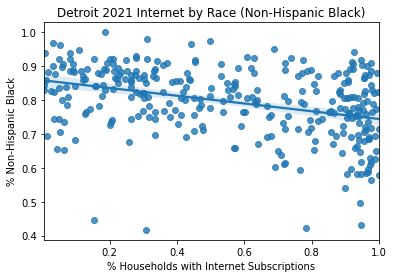

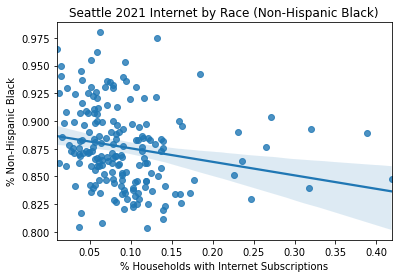

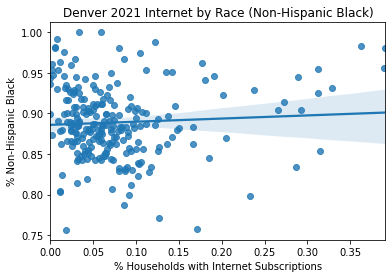

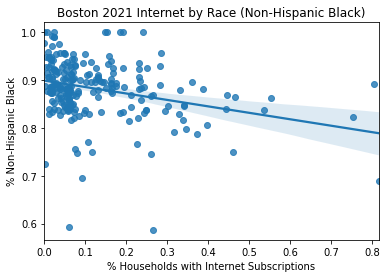

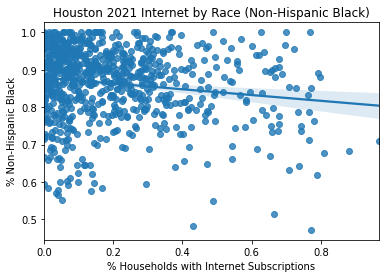

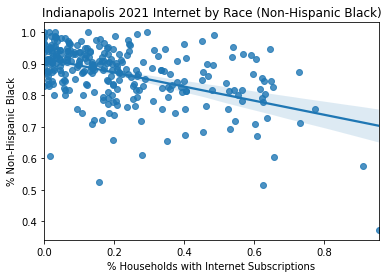

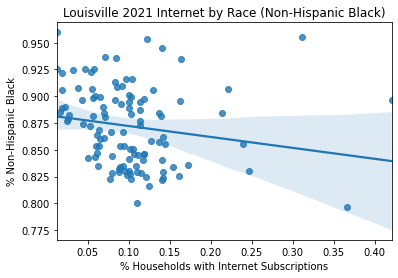

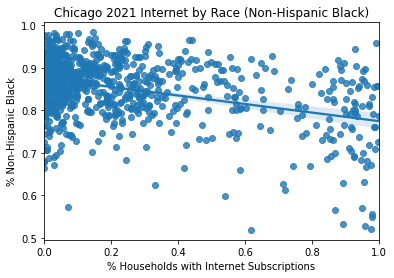

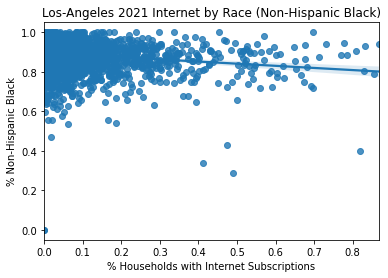

In [5]:
viz.plot_scatter(acs_2021_standard_df.drop_duplicates(subset='tract', keep='first'), "% Non-Hispanic Black",
                "PERC Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
                "City",
                 f'2021 Internet by Race (Non-Hispanic Black)',
                 '% Households with Internet Subscriptions',
                 '% Non-Hispanic Black'
                )

for city in set(acs_2017_standard_df['City']):
    city_df = acs_2021_standard_df[acs_2021_standard_df['City'] == city]
    viz.plot_scatter(city_df.drop_duplicates(subset='tract'), "% Non-Hispanic Black", 
                     "PERC Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD", 
                 'City',
                f'{city.title()} 2021 Internet by Race (Non-Hispanic Black)',
                '% Households with Internet Subscriptions',
                '% Non-Hispanic Black', True)

#### Part Two: Income

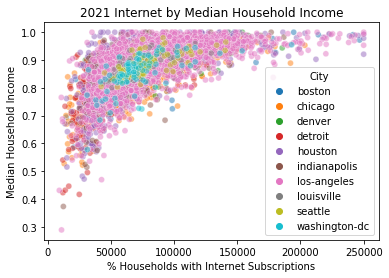

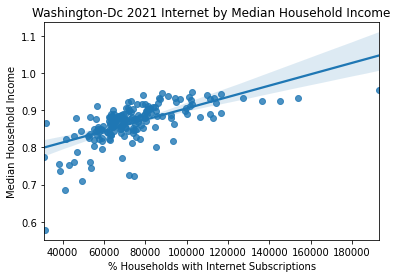

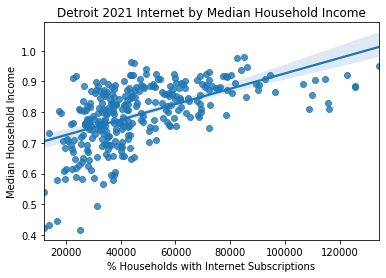

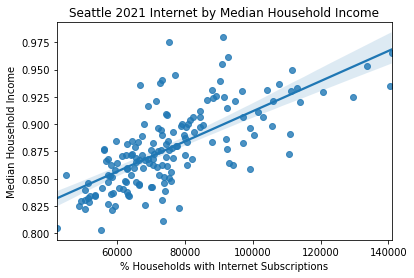

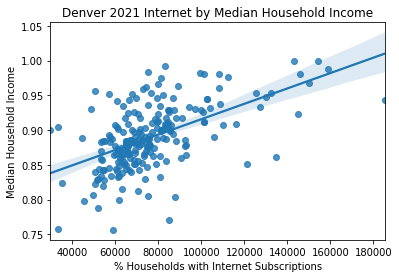

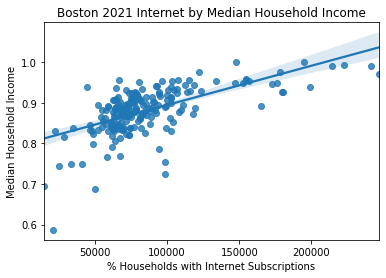

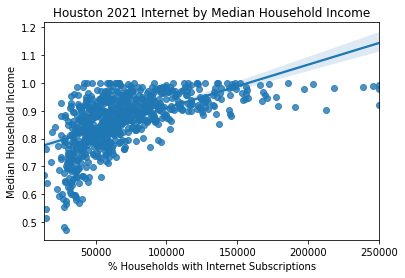

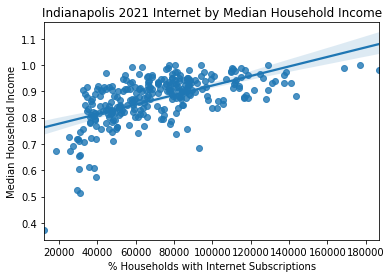

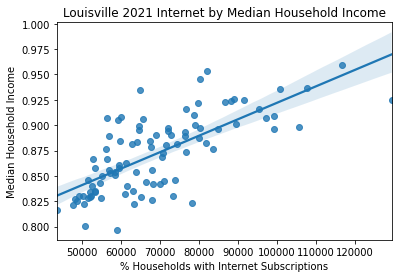

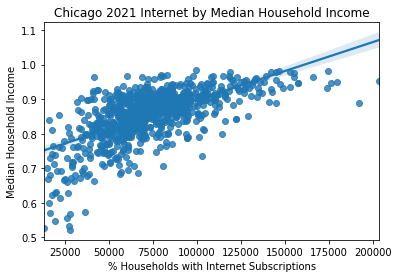

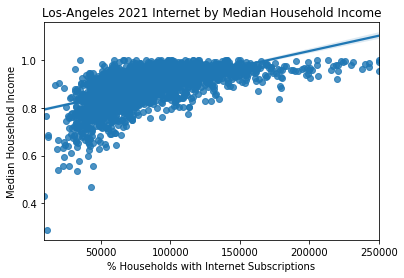

In [7]:
acs_2021_standard_df_income = acs_2021_standard_df[acs_2021_standard_df["Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars) MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)"] > 0]

viz.plot_scatter(acs_2021_standard_df_income.drop_duplicates(subset='tract', keep='first'), 
                 "Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars) MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)",
                "PERC Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
                "City",
                 f'2021 Internet by Median Household Income',
                 '% Households with Internet Subscriptions',
                 'Median Household Income'
                )

for city in set(acs_2021_standard_df_income['City']):
    city_df = acs_2021_standard_df_income[acs_2021_standard_df_income['City'] == city]
    viz.plot_scatter(city_df.drop_duplicates(subset='tract'),
                 "Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars) MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)",
                "PERC Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
                "City",
                 f'{city.title()} 2021 Internet by Median Household Income',
                 '% Households with Internet Subscriptions',
                 'Median Household Income', True)

#### Part Three: Other Variables of Interest

In [ ]:
## add other variables here